# Exercise 2 Notebook
After reading [Chapter 3](03_modelling.ipynb) and understanding the given examples, you can try solving the below exercises. Steps to solution are given to facilitate how you go through the problems. However, feel free to use your own logic and go through the problems yourself if you want to.

## **Exercise 2.1 — Linear fitting**
<br>
In the file 'meteo82d.dat' we can find the average wind speed for the given time periods in
column 15.
Read this data and create a normalized wind speed distribution (bins 0-1, 1-2 ,…m/s). This
distribution is commonly modelled with the Weibull-distribution:
$$ f(u) = \frac{k}{A} \cdot (\frac{u}{A})^{k-1} \cdot e^{{-(\frac{u}{A})^k}}$$
where $u$ is the wind speed in ms$^{-1}$.


> Hint: Double click the equation to zoom in.

In order to find the two Weibull parameters $A$ and $k$ we need to use the fitting techniques we have learned. One approach is linearization. The trick is to perform a fit not on the histogram but actually on its integral (compare "Cumulative Distribution Function"), which you can calculate easily from the measurement data. The resultant cumulative distribution is modelled using the equation: $$F(u) = 1 - e^{-(u/A)^k}$$
Obviously this is not a linear function yet but by applying two mathematical manipulations we can transform this into a linearized form. This is detailed [here](http://reliawiki.org/index.php/Parameter_Estimation) (notice that they use different symbols but the function is essentially the same).


The resultant linear function is shown below: $$\ln \left({\ln\left({\frac{1}{1-F(u)}}\right)} \right) = k \cdot \ln(u) - k \cdot \ln(A)$$ 

With this perform a linear fit and determine from the slope and offset the Weibull parameters. Finally plot your modelled Weibull distribution with the measurement data to get an idea about the fit quality
> Hint: If it becomes necessary to assign a numerical value to a bin. It is reasonable to use its center value, e.g: bin 1-2 $\rightarrow$ 1.5

### Steps to solution

1. Import the necessary libraries.

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import scipy.optimize as scipy_opt

2. Read the data from the 'meteo82d.dat' file and store it in a variable `meteo82`

In [12]:
meteo82 = pd.read_csv('meteo82d.dat', delimiter = '\t', header = None)

3. Store the all the values in column 15 in `meteo82` in a variable `u_avg`

In [13]:
u_avg = meteo82.iloc[:,14]

4. Plotting a histogram for the Weibull distribution using `matplotlib.pyplot.hist()`:
    - In order to have bins of approximately 1 ms$^{-1}$ size. The parameter `bins` (check [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) shall be equal to the integer from the subtraction of maximum and minimum values of `u_avg`. 
    - From the documentation, check which parameter shall return a **probability density** and apply it.
    - Add axes labels to your plot.

[Text(0, 0.5, 'Probability'), Text(0.5, 0, 'Wind Speed (ms$^-1$)')]

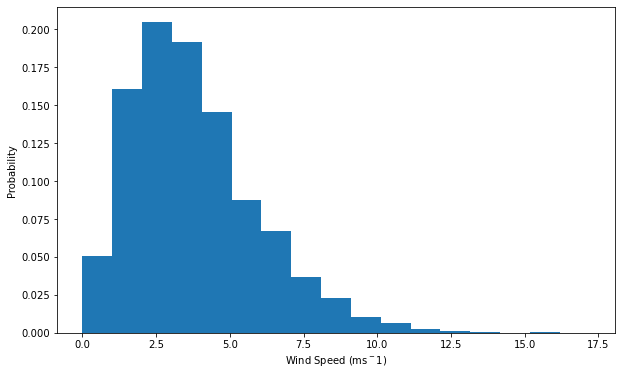

In [20]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax.hist(u_avg, bins= int(np.max(u_avg) - np.min(u_avg)), density=True)
ax.set(xlabel = 'Wind Speed (ms$^-1$)', ylabel = 'Probability')

5. Plot and use the return values from the CDF using `matplotlib.pyplot.hist()`. Use the same parameters used in the last step. Moreover, apply the following two points (check the function's documentation):
    - check which parameter can return the **cumulative distribution** and apply it.
    - check the *Returns* section and assign the variables `cy`, `cx` and `cp` (in that order) to the return values.

In [6]:
#u_avg = np.concatenate((np.repeat(1,1), np.repeat(2,2), th,fr, np.repeat(5,9), np.repeat(6,11), np.repeat(7,11), np.repeat(8,11), np.repeat(9,9), np.repeat(10,8), np.repeat(11,6), np.repeat(12,6), np.repeat(13,5), np.repeat(14,3), np.repeat(15,2), np.repeat(16,2), np.repeat(17,1), np.repeat(18,1)))

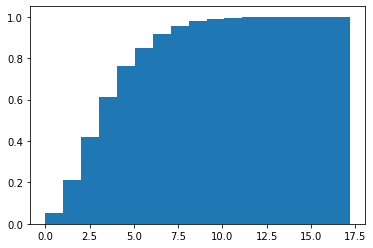

In [28]:
cy, cx, cp = plt.hist(u_avg, bins = 17, density = True, cumulative=True)

6. Create a `for` loop to calculate an array of the bins mid-points. Store the resultant array in variable `midcx`.

In [42]:
# midcx = (cx[1:] + cx[:-1]) / 2
# midhxn = (hx[1:] + hx[:-1]) / 2

In [47]:
midcx = np.zeros(len(cx)-1)
midcx[0] = (cx[0] + cx[1])/2
for i in range(1,len(cx)-1):
    midcx[i] = (cx[i+1] + cx[i]) / 2

7. Draw a line plot for the CDF using `midcx` and `cy` for the x and y axes respectively.

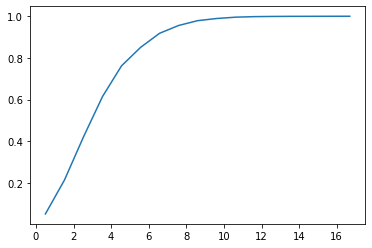

In [51]:
plt.plot(midcx, cy)

**Reminder:** The resultant line plot from step 7 can be modelled using the function: $F(u) = 1 - e^{-(u/A)^k}$. Using the linearization approach as discussed earlier, the function obtained is: $\ln \left({\ln\left({\frac{1}{1-F(u)}}\right)} \right) = k \cdot \ln(u) - k \cdot \ln(A)$. In this case, a linear fit can be used to determine the values of $A$ and $k$. 

💡> <font color=red> What variables in your notebook correspond to the values of $F(u)$ and $u$? </font>

8. Using the equation of line: $y = mx + c$. Assign the respective values of $y$ and $x$ in the function $\ln \left({\ln\left({\frac{1}{1-F(u)}}\right)} \right) = k \cdot \ln(u) - k \cdot \ln(A)$ to variables `yLine` and `xLine`. You will need to exclude any element equals to 1 when replaced in the `np.log()` function.

In [78]:
yLine = np.log(np.log(1/(1 - cy[:16])))

In [79]:
xLine = np.log(midcx[:16])

9. Using `xLine` and `yLine`, perform a linear fit and plot the data and fitting line. Refer to Example 3.2 for support.

[ 1.53338629 -1.97609248]


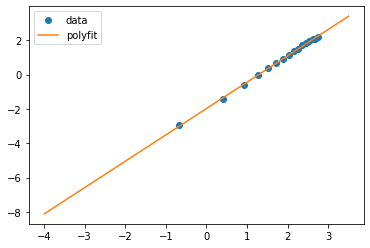

In [82]:
n = 1 #Degree of polynomial

p = np.polyfit(xLine, yLine, n) 
print(p)

Ti = np.linspace(-4, 3.5, 200)
fit_y = np.polyval(p, Ti) #Takes coefficients and calculates values at specified points

#Show results as figure 
fig, ax = plt.subplots() 
ax.plot(xLine, yLine, "o", Ti, fit_y, "-") 
plt.legend(["data", "polyfit"], loc="best")

array([0.21358447, 0.4206621 , 0.61426941, 0.76175799, 0.85034247,
       0.91815068, 0.95559361, 0.97876712, 0.98915525, 0.99554795,
       0.99817352, 0.99908676, 0.99954338, 0.99965753, 0.99988584])

[26.04415371 53.79326068]


C:\Users\moh_l\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[Text(0, 0.5, 'Current'), Text(0.5, 0, 'Voltage')]

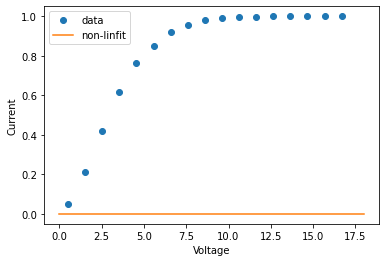

In [57]:
def windfunc(x, k, A):
    return (1 - np.exp((x/A)**k))

popt, pcov = scipy_opt.curve_fit(windfunc, midcx, cy, p0 = np.array([2,5])) 
print(popt)
xi = np.linspace(0,18,1000) #x-axis points at which to evaluate polynomial for graph
fit_y= windfunc(xi, popt[0], popt[1]) #Takes coefficients and calculates values at specified points

#Show results as figure
fig, ax = plt.subplots()
ax.plot(midcx, cy, "o", xi, fit_y, "-") 
plt.legend(["data", "non-linfit"], loc="best")
ax.set(xlabel="Voltage", ylabel="Current")
#ax.set(xlim=(0, 22.05), ylim=(-0.5, 4))
# plt.hist(u_avg, bins=17, density=True)

(array([5.05468833e-02, 1.60554051e-01, 2.04669746e-01, 1.91356058e-01,
        1.45773601e-01, 8.75544229e-02, 6.70197515e-02, 3.70075396e-02,
        2.29040565e-02, 1.02673357e-02, 6.31836041e-03, 2.59504088e-03,
        9.02622916e-04, 4.51311458e-04, 1.12827865e-04, 2.25655729e-04,
        1.12827865e-04]),
 array([ 0.        ,  1.01176471,  2.02352941,  3.03529412,  4.04705882,
         5.05882353,  6.07058824,  7.08235294,  8.09411765,  9.10588235,
        10.11764706, 11.12941176, 12.14117647, 13.15294118, 14.16470588,
        15.17647059, 16.18823529, 17.2       ]),
 <a list of 17 Patch objects>)

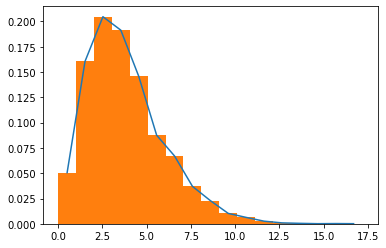

In [100]:
#y = np.log(np.log(1/(1 - hx[1:18])))
u = np.linspace(1,17.2,17)
#x = np.log(u)
plt.plot(midhxn, hyn)
plt.hist(u_avg, bins=17, density=True)

In [89]:
print(midhx)

[ 0.50588235  1.51764706  2.52941176  3.54117647  4.55294118  5.56470588
  6.57647059  7.58823529  8.6         9.61176471 10.62352941 11.63529412
 12.64705882 13.65882353 14.67058824 15.68235294 16.69411765]


In [90]:
print(hy)

[5.05468833e-02 1.60554051e-01 2.04669746e-01 1.91356058e-01
 1.45773601e-01 8.75544229e-02 6.70197515e-02 3.70075396e-02
 2.29040565e-02 1.02673357e-02 6.31836041e-03 2.59504088e-03
 9.02622916e-04 4.51311458e-04 1.12827865e-04 2.25655729e-04
 1.12827865e-04]


[1.92630426 4.13531315]


(array([5.05468833e-02, 1.60554051e-01, 2.04669746e-01, 1.91356058e-01,
        1.45773601e-01, 8.75544229e-02, 6.70197515e-02, 3.70075396e-02,
        2.29040565e-02, 1.02673357e-02, 6.31836041e-03, 2.59504088e-03,
        9.02622916e-04, 4.51311458e-04, 1.12827865e-04, 2.25655729e-04,
        1.12827865e-04]),
 array([ 0.        ,  1.01176471,  2.02352941,  3.03529412,  4.04705882,
         5.05882353,  6.07058824,  7.08235294,  8.09411765,  9.10588235,
        10.11764706, 11.12941176, 12.14117647, 13.15294118, 14.16470588,
        15.17647059, 16.18823529, 17.2       ]),
 <a list of 17 Patch objects>)

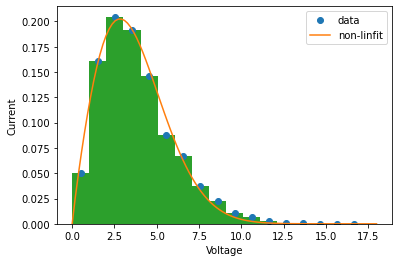

In [104]:
def windfunc(x, k, A):
    return (k/A)*((x/A)**(k-1))*np.exp(-(x/A)**k)

popt, pcov = scipy_opt.curve_fit(windfunc, midhxn, hyn, p0 = np.array([2,5])) 
print(popt)
xi = np.linspace(0,18,100) #x-axis points at which to evaluate polynomial for graph
fit_y= windfunc(xi, popt[0], popt[1]) #Takes coefficients and calculates values at specified points

#Show results as figure
fig, ax = plt.subplots()
ax.plot(midhxn, hyn, "o", xi, fit_y, "-") 
plt.legend(["data", "non-linfit"], loc="best")
ax.set(xlabel="Voltage", ylabel="Current")
#ax.set(xlim=(0, 22.05), ylim=(-0.5, 4))
plt.hist(u_avg, bins=17, density=True)

In [13]:
n = 1 #Degree of polynomial

p = np.polyfit(x, y, n) 
print(p)

Ti = np.linspace(, 3.5, 100)
fit_y = np.polyval(p, Ti) #Takes coefficients and calculates values at specified points

#Show results as figure 
fig, ax = plt.subplots() 
ax.plot(x, y, "o", Ti, fit_y, "-") 
plt.legend(["data", "polyfit"], loc="best")

NameError: name 'x' is not defined

In [ ]:
k = p[0]
A = float(np.exp(-p[1]/[p[0]]))

In [ ]:
k

In [ ]:
A

In [ ]:
f = (k/A)*((u/A)**(k-1))*np.exp(-(u/A)**k)

In [ ]:
f

In [ ]:
plt.plot(u,f)
plt.hist(u_avg, bins=18, density=True)